**Colab 드라이브 마운트**

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**라이브러리 불러오기**

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

**이미지 불러오기**

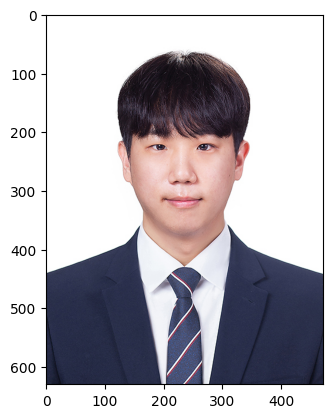

In [3]:
image_path = '/content/drive/MyDrive/aiffel/images/yunseo.jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(image)

**수염 불러오기**

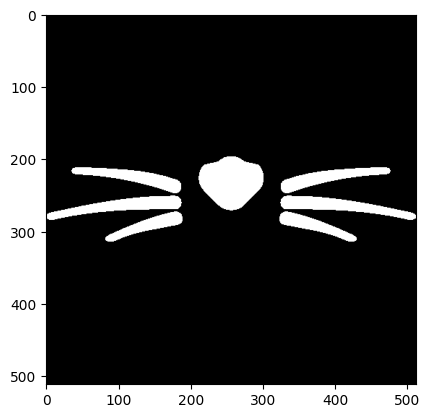

In [4]:
cat_whiskers_path = '/content/drive/MyDrive/aiffel/images/cat-whiskers.png'
whiskers = cv2.cvtColor(cv2.imread(cat_whiskers_path), cv2.COLOR_BGR2RGB)
whiskers = cv2.bitwise_not(whiskers)
plt.imshow(whiskers)

**face detection model 불러오기**

In [5]:
detector_hog = dlib.get_frontal_face_detector() # face detection model
dlib_rects = detector_hog(image, 1) # top, right, bottom, left

print(dlib_rects)

rectangles[[(139, 180) (324, 366)]]


In [6]:
image_show = image.copy() # 이미지 복사

**Bounding box 찾기**

In [7]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(image_show, (l, t), (r, b), (0, 255, 0), 4, lineType=cv2.LINE_AA) # bounding box

**68 Face Landmark**

In [8]:
model_path = '/content/drive/MyDrive/aiffel/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [9]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(image_show, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


**Face Landmark point**

In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(image_show, point, 2, (0, 255, 255), -1)


In [11]:
whiskers_sticker = whiskers

**수염 첨부하기**

In [12]:
whiskers_mask = np.any(whiskers_sticker[:, :, :3] != [255, 255, 255], axis=-1)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    nose_middle = landmark[34] # face landmark 34 index: nose
    lib_middle = landmark[52] # face landmark 52 index: lib
    w = h = dlib_rect.width() # boundig box size

    x = nose_middle[0] # sticker x-coordinate
    y = int((lib_middle[1] + nose_middle[1]) / 2) # sticker y-coordinate: (nose y-coordinate + lib y-coordinate)/2

    # x, y 위치 조정
    refined_x = x - w // 2
    refined_y = y - h // 2

    if refined_x < 0:
        whiskers_sticker = whiskers_sticker[:, -refined_x:]
        refined_x = 0

    if refined_y < 0:
        whiskers_sticker = whiskers_sticker[-refined_y:, :]
        refined_y = 0

    whiskers_sticker = cv2.resize(whiskers, (w, h))
    # 스티커 붙이기
    sticker_area = image_show[refined_y:refined_y + whiskers_sticker.shape[0], refined_x:refined_x + whiskers_sticker.shape[1]]
    image_show[refined_y:refined_y + whiskers_sticker.shape[0], refined_x:refined_x + whiskers_sticker.shape[1]] = \
        np.where(whiskers_sticker == 0, sticker_area, whiskers_sticker).astype(np.uint8)

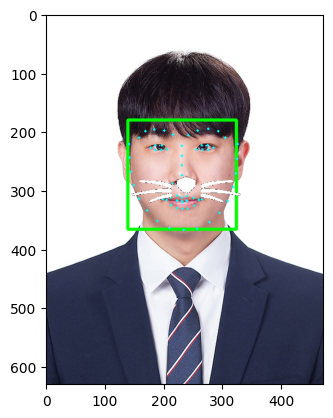

In [13]:
plt.imshow(image_show) # 스티커가 흰색으로 발생하는 오류 발생
plt.show()

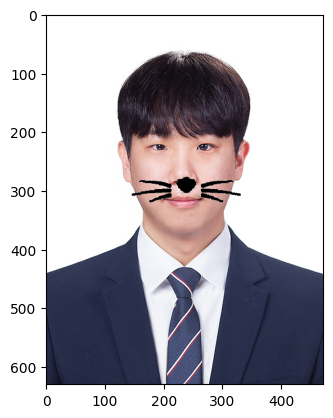

In [17]:
sticker_area = image[refined_y:refined_y +whiskers_sticker.shape[0], refined_x:refined_x+whiskers_sticker.shape[1]]


image[refined_y:refined_y +whiskers_sticker.shape[0], refined_x:refined_x+whiskers_sticker.shape[1]] = \
    np.where(whiskers_sticker==0,sticker_area,whiskers_sticker-255).astype(np.uint8) # 오류 해결: 스티커 색 바꾸기(whiskers_sticker-255)
plt.imshow(image)
plt.show()

# 회고
이번 exploratin을 통해 Dlib와 OpenCV를 활용하여 Face Recognition과 Face Landmark Detection을 구현해보았다. 이미지 처리를 통해 수염에 투명한 배경을 적용할 수 있었고, 수염이 흰색으로 나오는 오류를 검정색으로 나오도록 해결하였다.